# Is it faster to walk through Spadina Station to the Bloor Line, or stay on the train and transfer at St. George?
*March 2, 2022*

There's a question that Torontians regularly ask when taking the Yonge-University subway southbouth and transfering to the Westbound Bloor Line: is it faster to get off at Spadina and walk, or to continue on the train and transfer at St. George?

The problem is that between the two lines at Spadina is a long walkway, and it takes several minutes to get to the Bloor Line platform. But at St. George Station, another transfer station, it's a 5 second walk up the stairs to get to the Bloor platform. But of course, you need to ride the train to St. George and then back to Spadina, so it adds time.

So: which way is faster?

Let's use [route and stop data](https://open.toronto.ca/dataset/ttc-routes-and-schedules/) provided by the City of Toronto to figure it out. We'll use pandas for analysis and Python's datetime module to handle datetime and timedelta objects.

In [2]:
import pandas as pd
import datetime2203724ce284cbf395ee7e683e6107788107cccd05784399387e2afb1906d1345

There are many different datasets in the file we downloaded. We'll use these four for the analysis.

In [3]:
stop_times = pd.read_csv("schedule_data/stop_times.txt")
routes = pd.read_csv("schedule_data/routes.txt")
stops = pd.read_csv("schedule_data/stops.txt")
trips = pd.read_csv("schedule_data/trips.txt")

The numbers we need to solve this problem ultimately are in the stop_times dataframe.

In [157]:
stop_times.head(5)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,45417218,9:15:00,9:15:00,14155,1,NaN,0,0,NaN
1,45417218,9:16:20,9:16:20,3807,2,NaN,0,0,0.3546
2,45417218,9:17:13,9:17:13,6904,3,NaN,0,0,0.5903
3,45417218,9:18:36,9:18:36,1163,4,NaN,0,0,0.9613
4,45417218,9:19:49,9:19:49,7723,5,NaN,0,0,1.2849


The trip_id column is going to be important. Let's see what the dataframe looks like.

In [158]:
trips.head(5)

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed
0,68631,1,45417228,EAST - 10 VAN HORNE towards VICTORIA PARK,NaN,0,1965187,953035,1,1
1,68631,1,45417233,EAST - 10 VAN HORNE towards VICTORIA PARK,NaN,0,1965187,953036,1,1
2,68631,1,45417223,EAST - 10 VAN HORNE towards VICTORIA PARK,NaN,0,1965187,953036,1,1
3,68631,1,45417222,EAST - 10 VAN HORNE towards VICTORIA PARK,NaN,0,1965187,953036,1,1
4,68631,1,45417221,EAST - 10 VAN HORNE towards VICTORIA PARK,NaN,0,1965187,953036,1,1


Here we have another interesting column, and that's route_id. Let's take a look at the route dataframe now!

In [159]:
routes.head(5)

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
0,68840,1,1,LINE 1 (YONGE-UNIVERSITY),NaN,1,NaN,D5C82B,000000
1,68631,1,10,VAN HORNE,NaN,3,NaN,FF0000,FFFFFF
2,68632,1,100,FLEMINGDON PARK,NaN,3,NaN,FF0000,FFFFFF
3,68633,1,101,DOWNSVIEW PARK,NaN,3,NaN,FF0000,FFFFFF
4,68634,1,102,MARKHAM RD.,NaN,3,NaN,FF0000,FFFFFF


Taking a look at these three dataframes gives us a clue as to how the data is organized. We need to find the trips that the Yonge-University Line and the Bloor Line take between the stops of Spadina and St. George.

Let's find the route ids for our two TTC lines.

In [168]:
ttc_routes = routes[routes["route_long_name"].str.contains("LINE 1|LINE 2")]

ttc_routes

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
0,68840,1,1,LINE 1 (YONGE-UNIVERSITY),NaN,1,NaN,D5C82B,000000
52,68841,1,2,LINE 2 (BLOOR - DANFORTH),NaN,1,NaN,008000,FFFFFF


Now let's see the trips that these two routes take.

In [172]:
ttc_trips = trips[trips["route_id"].isin(ttc_routes["route_id"].astype(int).to_list())]

ttc_trips.head(3)

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed
36644,68840,1,45543404,LINE 1 (YONGE-UNIVERSITY) towards VAUGHAN METR...,NaN,0,1970948,956429,1,2
36645,68840,1,45543414,LINE 1 (YONGE-UNIVERSITY) towards VAUGHAN METR...,NaN,0,1970946,956429,1,2
36646,68840,1,45543426,LINE 1 (YONGE-UNIVERSITY) towards VAUGHAN METR...,NaN,0,1970945,956429,1,2


Now let's take a look at the stops dataset. 

In [181]:
stops.head(3)

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
0,262,662,Danforth Rd at Kennedy Rd,NaN,43.714379,-79.260939,NaN,NaN,NaN,NaN,NaN,1
1,263,929,Davenport Rd at Bedford Rd,NaN,43.674448,-79.399659,NaN,NaN,NaN,NaN,NaN,1
2,264,940,Davenport Rd at Dupont St,NaN,43.675511,-79.401938,NaN,NaN,NaN,NaN,NaN,2


These are all the stops on both lines, but we're only really interested in a subset:
* The trips on Yonge-University Line from Spadina to St. George.
* The trips on Bloor Line from St. George to Spadina.

It's hard to know what we're looking at without stop names in the trips dataset, so let's join stop names by stop_ids onto our trips dataset.

In [223]:
ttc_trip_ids = ttc_trips["trip_id"].unique()

ttc_stop_times = (stop_times[stop_times["trip_id"].isin(ttc_trip_ids)]
                    .set_index("stop_id")
                    .join(stops.set_index("stop_id")[["stop_name"]])
                    )

ttc_stop_times.head(5)

,trip_id,arrival_time,departure_time,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,stop_name
stop_id,,,,,,,,,
14404,45543404,5:31:21,5:31:21,1,NaN,0,0,NaN,Finch Station - Southbound Platform
14404,45543414,5:36:08,5:36:08,1,NaN,0,0,NaN,Finch Station - Southbound Platform
14404,45543419,6:13:49,6:13:49,1,NaN,0,0,NaN,Finch Station - Southbound Platform
14404,45543420,6:09:07,6:09:07,1,NaN,0,0,NaN,Finch Station - Southbound Platform
14404,45543421,6:04:25,6:04:25,1,NaN,0,0,NaN,Finch Station - Southbound Platform


By taking a look at the stop_name column, we can see the naming convention for the stations, and can guess at what our stations will be called and can filter our stops list for those.

In [224]:
ttc_stop_times = (ttc_stop_times[ttc_stop_times["stop_name"]
                                     .str.contains("St George Station - Southbound Platform|Spadina Station - Southbound Platform|St George Station - Westbound Platform|Spadina Station - Westbound Platform")]
                    )

ttc_stop_times["stop_name"].unique()

array(['Spadina Station - Southbound Platform',
       'St George Station - Southbound Platform',
       'St George Station - Westbound Platform',
       'Spadina Station - Westbound Platform'], dtype=object)

Now that we have a rough subset of the data that we're interested in, let's take a second to fix a problem we have in our arrival_time and departure_time columns: the timecode is a string. Pandas normally doesn't have a hard time handling this, but let's take a look at the error it throws if we try to convert.

In [225]:
try: pd.to_datetime(ttc_stop_times["arrival_time"])
except Exception as e:
    print(e)

hour must be in 0..23: 24:22:46


Hard to fault pandas...there is no hour 24 in a day. This hints at a strange way this TTC date is organized. Rather than report 2 a.m. as 02:00:00, it reports it as 26:00:00. The reason is the data wants to show a continous day's schedule as one unit. If it reported the time as 2 a.m., it would show at the start of the day, and if 2 a.m. was the last route run that day, it would then have a huge gap before the next day started.

We can fix this to better suit our purposes, though. Let's define a little function that we can apply to the column to turn the string into a datetime.

In [226]:
def clean_time(time_string):
    
    # Take the time string in this row and split it by colons.
    # The first item in the list becomes the hour, the second the minute, and the third the seconds.
    time_list = time_string.split(":")
    
    # If the hour is less than 23...
    if int(time_list[0]) < 24:
        
        # Report the hour as-is.
        hour = int(time_list[0])
        
        # Assign an arbitrary but consisent day. In this case, we'll pretend the day is March 2, 2022.
        day = 2
        
    # If the hour is greater than 23...
    else:
        
        # Subtract 23 from it to get the hour we know it as.
        hour = int(time_list[0]) - 23
        
        # And instead report it as the next day.
        day = 3
    
    # Report the minute as an integer.
    minute = int(time_list[1])
    
    # Report the second as an integer.
    seconds = int(time_list[2])
    
    # Return the whole thing built as a datetime object.
    return datetime.datetime(year=2022, month=3, day=day, hour=hour, minute=minute, second=seconds)

Let's try it!

In [227]:
ttc_stop_times["arrival_time"] = ttc_stop_times["arrival_time"].apply(lambda x: clean_time(x))
ttc_stop_times["departure_time"] = ttc_stop_times["departure_time"].apply(lambda x: clean_time(x))

ttc_stop_times.head(3)

,trip_id,arrival_time,departure_time,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,stop_name
stop_id,,,,,,,,,
14444,45543667,2022-03-02 06:50:26,2022-03-02 06:50:26,15,NaN,0,0,19.4416,Spadina Station - Southbound Platform
14444,45543669,2022-03-02 06:44:46,2022-03-02 06:44:46,15,NaN,0,0,19.4416,Spadina Station - Southbound Platform
14444,45543670,2022-03-02 06:41:56,2022-03-02 06:41:56,8,NaN,0,0,9.3982,Spadina Station - Southbound Platform


Let's also take a peek at the end of the dataset here to make sure our early-morning hours went into the next day.

In [228]:
ttc_stop_times.tail(3)

,trip_id,arrival_time,departure_time,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,stop_name
stop_id,,,,,,,,,
14515,45547524,2022-03-03 02:44:00,2022-03-03 02:44:00,17,NaN,0,0,14.843,Spadina Station - Westbound Platform
14515,45547525,2022-03-03 02:50:00,2022-03-03 02:50:00,17,NaN,0,0,14.843,Spadina Station - Westbound Platform
14515,45547526,2022-03-03 02:56:00,2022-03-03 02:56:00,17,NaN,0,0,14.843,Spadina Station - Westbound Platform


Success! Now that we have our subset with clean datetime columns, we can move forward with our analysis.

### Segment times

The way we solve this problem is by comparing two trips:
* Walking from Spadina (Yonge-University) to Spadina (Bloor) and waiting for the next train.
* Staying on the train and going from Spadina to St. George, waiting for the next train, then riding the train from St. George to Spadina.

A critical part of estimating the second trip is knowing how long the train takes to go between Spadina and St. George, then back to Spadina. Let's figure that out now.

We'll isolate one such trip in our dataset here.

In [229]:
test_trip = ttc_stop_times[ttc_stop_times["trip_id"] == 45544278]

test_trip

,trip_id,arrival_time,departure_time,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,stop_name
stop_id,,,,,,,,,
14444,45544278,2022-03-02 22:59:19,2022-03-02 22:59:19,15,NaN,0,0,19.4416,Spadina Station - Southbound Platform
14445,45544278,2022-03-02 23:00:47,2022-03-02 23:00:47,16,NaN,0,0,20.1374,St George Station - Southbound Platform


How long does this trip take? We can subtract the departure_time in the first row from the arrival_time in the second row.

It's worth noting here that in most (or maybe all) cases, the arrival_time and the departure_time are the same, and so we can probably just use arrival_time for both. Interesting that the schedules do not account for stopping to let people on. Our analysis will pretend that takes no time, as well. In reality it's likely just a few seconds it's stopped for, anyways.

In [232]:
test_trip.iat[1,1] - test_trip.iat[0,2]

Timedelta('0 days 00:01:28')

This test trip we pulled out takes about a minute and a half. It's probably safe enough to assume that every trip will take the same amount of time. These are schedules, after all, not actual times of arrival and departure. But to be safe, let's do this for all trips and average them out.

In [233]:
frames = []

for trip_id in ttc_stop_times["trip_id"].unique():
    trip = ttc_stop_times[ttc_stop_times["trip_id"] == trip_id].sort_values("arrival_time")

    if len(trip) > 1:
        segment_duration = trip.iat[1,1] - trip.iat[0,2]

        segment_name = trip.iat[0,-1] + " to " + trip.iat[1,-1]

        df = pd.DataFrame({"segment_name": [segment_name], "duration": [segment_duration]})
        
        frames.append(df)
    else:
        pass
    
segment_times = pd.concat(frames).pivot_table(index="segment_name", values="duration", aggfunc="mean")

segment_times

,duration
segment_name,
Spadina Station - Southbound Platform to St George Station - Southbound Platform,0 days 00:01:41.585714285
St George Station - Westbound Platform to Spadina Station - Westbound Platform,0 days 00:01:00


These numbers actually give us a pretty good estimate of how long the second trip - not walking, but staying on the train - would take!

In [16]:
segment_times["duration"].sum()

Timedelta('0 days 00:02:41.585714285')

Of course, it's more complicated than this: what if you're waiting forever for that train at St. George? You do have to transfer, after all. So we have more work to do. But we'll refer to these calculations when we do our math down below.

### The math

We're going to split our dataset into three now: the stop times at each station: Spadina heading southbound, St. George heading west, and Spadina heading west.

In [234]:
spadina_south = ttc_stop_times[ttc_stop_times["stop_name"] == "Spadina Station - Southbound Platform"].sort_values("arrival_time")

george_west = ttc_stop_times[ttc_stop_times["stop_name"] == "St George Station - Westbound Platform"].sort_values("arrival_time")

spadina_west = ttc_stop_times[ttc_stop_times["stop_name"] == "Spadina Station - Westbound Platform"].sort_values("arrival_time")

In [369]:
trips[trips["trip_id"] == 45544882]

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed
95453,68840,3,45544882,LINE 1 (YONGE-UNIVERSITY) towards FINCH STATION,NaN,1,1971048,956608,1,2


In [368]:
spadina_south

,trip_id,arrival_time,departure_time,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,stop_name
stop_id,,,,,,,,,
14444,45543691,2022-03-02 06:00:35,2022-03-02 06:00:35,3,NaN,0,0,2.0186,Spadina Station - Southbound Platform
14444,45544229,2022-03-02 06:03:18,2022-03-02 06:03:18,3,NaN,0,0,2.0186,Spadina Station - Southbound Platform
14444,45545169,2022-03-02 06:03:18,2022-03-02 06:03:18,3,NaN,0,0,2.0186,Spadina Station - Southbound Platform
14444,45543703,2022-03-02 06:06:56,2022-03-02 06:06:56,8,NaN,0,0,9.3982,Spadina Station - Southbound Platform
14444,45544230,2022-03-02 06:09:19,2022-03-02 06:09:19,8,NaN,0,0,9.3982,Spadina Station - Southbound Platform
...,...,...,...,...,...,...,...,...,...
14444,45543851,2022-03-03 02:32:46,2022-03-03 02:32:46,15,NaN,0,0,19.4416,Spadina Station - Southbound Platform
14444,45544882,2022-03-03 02:35:19,2022-03-03 02:35:19,15,NaN,0,0,19.4416,Spadina Station - Southbound Platform
14444,45544438,2022-03-03 02:35:19,2022-03-03 02:35:19,15,NaN,0,0,19.4416,Spadina Station - Southbound Platform


We'll also store the times for each segment of trip #2 (not walking, staying on the train) that we found above into variables for use in a second.

In [236]:
time_on_train_from_spadina_to_george = segment_times.at["Spadina Station - Southbound Platform to St George Station - Southbound Platform", "duration"]

time_on_train_from_george_to_spadina = segment_times.at["St George Station - Westbound Platform to Spadina Station - Westbound Platform", "duration"]

Now we're going to loop through every departure time from Spadina going south, which represents a scenario where you make two choices. In every case, you'll be on one of these trains already (if you lived near Spadina station, for example, you would always go to the westbound Bloor Line station - why would you not? Therefore, you'll always be on a train when the scenario starts).

Your two choices are:
* Get off the train and walk to the westbound Bloor Line platform at Spadina.
* Stay on the train, take it to St. George, wait for a train at St. George, and take it back towards Spadina.

So for each time that the train leaves Spadina, we'll tally up the time each trip takes.

In [370]:
# An empty list where we'll store data temporarily as we go through the loop.
data = []

# For every stop time in the spadina_south dataset:
for i, stop in spadina_south.iterrows():
    
    ## Scenario #1: Walking to Spadina westbound platform.
    
    # I went and walked this distance for this variable, which is the time it takes to walk that tunnel to the other platform
    # at Spadina station.
    time_to_walk = datetime.timedelta(minutes=2, seconds=50)
    
    # The time you arrive at the Westbound platform is equal to the time the train arrived and dropped you off,
    # plus the time it takes to walk.
    you_arrive_at_spadina_west = stop["arrival_time"] + time_to_walk
    
    # Now you're at the station, and we need to find the next train that comes by the westbound platform after you arrive.
    next_train_leaves_from_spadina_west = (spadina_west
                                           .loc[spadina_west["arrival_time"] >= you_arrive_at_spadina_west, "arrival_time"]
                                           .min()
                                           )
    
    # Now the total length of your trip is the time from when you get off your train at Spadina south
    # to the time your new train arrives at Spadina west.
    travel_time_if_walking = next_train_leaves_from_spadina_west - stop["arrival_time"]
    
    
    
    ## Scenario #2: Staying on the train
    
    # The time you arrive at St. George station is equal to the time you arrived at Spadina south
    # plus the time the trip to St. George takes
    # plus the 10 seconds it takes to walk up the stairs to the westbound platform.
    you_arrive_at_george = stop["arrival_time"] + time_on_train_from_spadina_to_george + datetime.timedelta(seconds=10)
    
    # Now you're at St. George West, and you need to catch the next train. Let's find out when that is.
    time_next_train_leave_george = (george_west
                                    .loc[george_west["arrival_time"] >= you_arrive_at_george, "arrival_time"]
                                    .min()
                                    )
    
    # The time you arrive at Spadina west is equal to the time you leave St. George on that next train
    # plus the travel time from St. George to Spadina.
    time_train_arrives_at_spadina_west = time_next_train_leave_george + time_on_train_from_george_to_spadina
    
    # The travel time is the time between arriving at Spadina South and arriving at Spadina West.
    travel_time_if_not_walking = time_train_arrives_at_spadina_west - stop["arrival_time"]
    
    
    
    ## Now we store the relevant information in a pandas dataframe.
    entry = (pd.DataFrame({
                            "time_arriving_at_spadina": [stop["arrival_time"]],
                            "travel_time_if_walking": [travel_time_if_walking],
                            "travel_time_if_not_walking": [travel_time_if_not_walking],
                           })
             )
    
    # And we append this dataframe -- really just one row -- to our list.
    data.append(entry)

# When the loop is done, concatenate all the data into one frame.  
table = pd.concat(data)

# Show the frame!
table.sample(5)

,time_arriving_at_spadina,travel_time_if_walking,travel_time_if_not_walking
0,2022-03-02 07:57:19,0 days 00:03:21,0 days 00:03:21
0,2022-03-02 08:15:19,0 days 00:03:42,0 days 00:03:42
0,2022-03-02 06:57:19,0 days 00:03:50,0 days 00:03:50
0,2022-03-02 21:27:19,0 days 00:04:41,0 days 00:04:41
0,2022-03-02 13:17:06,0 days 00:04:19,0 days 00:04:19


The bulk of the math is done! Now we just need to make sense of it all. We'll make a boolean column that says whether or not you should walk at Spadina.

In [371]:
table.loc[table["travel_time_if_not_walking"] > table["travel_time_if_walking"] , "better_scenario"] = "Walk"
table.loc[table["travel_time_if_not_walking"] < table["travel_time_if_walking"] , "better_scenario"] = "Stay on Train"
table.loc[table["travel_time_if_not_walking"] == table["travel_time_if_walking"] , "better_scenario"] = "Doesn't matter"

table.head(3)

,time_arriving_at_spadina,travel_time_if_walking,travel_time_if_not_walking,better_scenario
0,2022-03-02 06:00:35,0 days 00:04:50,0 days 00:04:50,Doesn't matter
0,2022-03-02 06:03:18,0 days 00:04:02,0 days 00:04:02,Doesn't matter
0,2022-03-02 06:03:18,0 days 00:04:02,0 days 00:04:02,Doesn't matter


Now let's group by True or False on this new column, and report the results!

In [372]:
summary = table.groupby("better_scenario")["time_arriving_at_spadina"].count()

summary

better_scenario
Doesn't matter    912
Stay on Train      68
Name: time_arriving_at_spadina, dtype: int64

In essence, it's never going to hurt to stay on the train - it'll always be faster or the same time as getting off and walking. Let's see what percentage of the time it's worth it to stay on the train versus getting off and walking.

In [373]:
( summary.sum() - summary["Doesn't matter"] ) / summary.sum()

0.06938775510204082

Now let's figure out *how much* time you save -- in the cases when you do save time -- by staying on the train.

In [374]:
table["time_savings"] = abs(table["travel_time_if_walking"] - table["travel_time_if_not_walking"])

table.head()

,time_arriving_at_spadina,travel_time_if_walking,travel_time_if_not_walking,better_scenario,time_savings
0,2022-03-02 06:00:35,0 days 00:04:50,0 days 00:04:50,Doesn't matter,0 days
0,2022-03-02 06:03:18,0 days 00:04:02,0 days 00:04:02,Doesn't matter,0 days
0,2022-03-02 06:03:18,0 days 00:04:02,0 days 00:04:02,Doesn't matter,0 days
0,2022-03-02 06:06:56,0 days 00:04:29,0 days 00:04:29,Doesn't matter,0 days
0,2022-03-02 06:09:19,0 days 00:03:10,0 days 00:03:10,Doesn't matter,0 days


How much time do you save when staying on the train is the right choice?

In [375]:
table.loc[table["better_scenario"] == "Walk", "time_savings"].mean()

NaT

And what's the most amount of time you could save?

In [376]:
table.loc[table["better_scenario"] == "Walk", "time_savings"].max()

NaT

array([[<AxesSubplot:title={'center':'time_arriving_at_spadina'}>]],
      dtype=object)

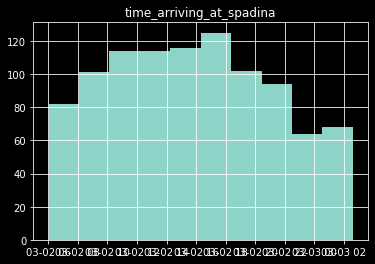

In [377]:
table[["time_arriving_at_spadina", "time_savings"]].hist()

### A twist - delays

There's another element to this that we can add in: delays.

For the most part, train delays affect each of our scenarios equally. If a trains are delayed on the Bloor Line and 

In [378]:
raw_delays = pd.read_excel("schedule_data/2022-delays.xlsx")

raw_delays

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2022-01-01,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023
1,2022-01-01,02:23,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0
2,2022-01-01,22:00,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0
3,2022-01-01,02:28,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0
4,2022-01-01,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981
...,...,...,...,...,...,...,...,...,...,...
19890,2022-12-31,01:20,Saturday,BAY STATION,SUUT,16,22,E,BD,5089
19891,2022-12-31,01:31,Saturday,SHEPPARD WEST STATION,EUAC,23,29,N,YU,5656
19892,2022-12-31,01:33,Saturday,BAY STATION,MUPAA,0,0,E,BD,5313
19893,2022-12-31,01:49,Saturday,YONGE BD STATION,MUPAA,3,9,E,BD,5211


In [379]:
raw_delays[raw_delays["Station"].str.contains("GEORGE")]["Station"].unique()

array(['ST GEORGE YUS STATION', 'ST GEORGE BD STATION',
       'ST. GEORGE STATION', 'ST GEORGE STATION TO B',
       'ST GEORGE TO BROADVIEW', 'BROADVIEW TO ST GEORGE',
       'CHRISTIE - ST GEORGE S', 'ST GEORGE STATION'], dtype=object)

In [380]:
delays = raw_delays.copy()
george_delays = (delays[delays["Station"].isin(["ST GEORGE BD STATION",
                                                "ST GEORGE YUS STATION",
                                                "ST GEORGE STATION",
                                                "ST. GEORGE STATION",
                                                ])]
                 )

george_delays

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
27,2022-01-01,11:17,Saturday,ST GEORGE YUS STATION,TUO,5,10,S,YU,5936
32,2022-01-01,18:12,Saturday,ST GEORGE YUS STATION,MUSAN,7,12,S,YU,5666
48,2022-01-01,23:45,Saturday,ST GEORGE BD STATION,SUDP,0,0,W,BD,5181
126,2022-01-03,08:20,Monday,ST GEORGE YUS STATION,PUOPO,3,6,N,YU,6011
128,2022-01-03,08:46,Monday,ST GEORGE YUS STATION,PUOPO,0,0,N,YU,5521
...,...,...,...,...,...,...,...,...,...,...
19764,2022-12-29,17:57,Thursday,ST GEORGE YUS STATION,SUAP,0,0,NaN,YU,0
19801,2022-12-30,13:21,Friday,ST GEORGE BD STATION,SUDP,6,9,E,BD,5233
19848,2022-12-31,10:00,Saturday,ST GEORGE BD STATION,EUBO,5,10,W,BD,5182
19864,2022-12-31,15:44,Saturday,ST GEORGE YUS STATION,MUIRS,0,0,NaN,YU,0


In [381]:
idx = pd.date_range('01-01-2022', '12-31-2022')

daily_delays_count = george_delays.groupby("Date")["Min Delay"].count().to_frame()
daily_delays_duration = george_delays.groupby("Date")["Min Delay"].sum().to_frame()

daily_delays_count = daily_delays_count.join(daily_delays_duration, rsuffix="(Min)")

daily_delays_count = daily_delays_count.reindex(idx, fill_value=0)

daily_delays_count

,Min Delay,Min Delay(Min)
2022-01-01,3,12
2022-01-02,0,0
2022-01-03,3,6
2022-01-04,4,7
2022-01-05,1,3
...,...,...
2022-12-27,0,0
2022-12-28,3,21
2022-12-29,2,4
2022-12-30,1,6


In [382]:
operational_minutes = (george_west["arrival_time"].max() - george_west["arrival_time"].min()).seconds / 60

In [383]:
daily_delays_count["delay_chance"] = daily_delays_count["Min Delay(Min)"] / operational_minutes

In [384]:
daily_delays_count.sort_values("delay_chance", ascending=False)

,Min Delay,Min Delay(Min),delay_chance
2022-11-15,4,141,0.112127
2022-04-02,2,120,0.095427
2022-04-19,3,50,0.039761
2022-12-09,2,44,0.034990
2022-07-01,7,42,0.033400
...,...,...,...
2022-03-22,0,0,0.000000
2022-09-30,0,0,0.000000
2022-05-24,1,0,0.000000
2022-08-07,0,0,0.000000


In [385]:
chance_of_delay_each_minute = daily_delays_count["Min Delay(Min)"].sum() / (365 * operational_minutes)

In [386]:
avg_delay_length = george_delays["Min Delay"].mean()

In [387]:
expected_delay = chance_of_delay_each_minute * avg_delay_length

expected_delay

0.02305945151011738

In [388]:
table_with_delays = table.copy()

table_with_delays["delay_if_not_walking"] = table_with_delays["travel_time_if_not_walking"] * expected_delay
table_with_delays["delay_if_walking"] = table_with_delays["travel_time_if_walking"] * expected_delay

table_with_delays["travel_time_if_not_walking"] = table_with_delays["travel_time_if_not_walking"] + table_with_delays["delay_if_not_walking"]
table_with_delays["travel_time_if_walking"] = table_with_delays["travel_time_if_walking"] + table_with_delays["delay_if_walking"]

table_with_delays.loc[table_with_delays["travel_time_if_not_walking"] > table_with_delays["travel_time_if_walking"] , "should_walk_at_spadina?"] = True
table_with_delays.loc[table_with_delays["travel_time_if_not_walking"] <= table_with_delays["travel_time_if_walking"] , "should_walk_at_spadina?"] = False
table_with_delays["should_walk_at_spadina?"] = table_with_delays["should_walk_at_spadina?"]

table_with_delays

,time_arriving_at_spadina,travel_time_if_walking,travel_time_if_not_walking,better_scenario,time_savings,delay_if_not_walking,delay_if_walking,should_walk_at_spadina?
0,2022-03-02 06:00:35,0 days 00:04:56.687240937,0 days 00:04:56.687240937,Doesn't matter,0 days,0 days 00:00:06.687240937,0 days 00:00:06.687240937,False
0,2022-03-02 06:03:18,0 days 00:04:07.580387265,0 days 00:04:07.580387265,Doesn't matter,0 days,0 days 00:00:05.580387265,0 days 00:00:05.580387265,False
0,2022-03-02 06:03:18,0 days 00:04:07.580387265,0 days 00:04:07.580387265,Doesn't matter,0 days,0 days 00:00:05.580387265,0 days 00:00:05.580387265,False
0,2022-03-02 06:06:56,0 days 00:04:35.202992456,0 days 00:04:35.202992456,Doesn't matter,0 days,0 days 00:00:06.202992456,0 days 00:00:06.202992456,False
0,2022-03-02 06:09:19,0 days 00:03:14.381295786,0 days 00:03:14.381295786,Doesn't matter,0 days,0 days 00:00:04.381295786,0 days 00:00:04.381295786,False
...,...,...,...,...,...,...,...,...
0,2022-03-03 02:32:46,0 days 00:05:21.240667774,0 days 00:05:21.240667774,Doesn't matter,0 days,0 days 00:00:07.240667774,0 days 00:00:07.240667774,False
0,2022-03-03 02:35:19,0 days 00:05:12.033132710,0 days 00:05:12.033132710,Doesn't matter,0 days,0 days 00:00:07.033132710,0 days 00:00:07.033132710,False
0,2022-03-03 02:35:19,0 days 00:05:12.033132710,0 days 00:05:12.033132710,Doesn't matter,0 days,0 days 00:00:07.033132710,0 days 00:00:07.033132710,False
0,2022-03-03 02:35:19,0 days 00:05:12.033132710,0 days 00:05:12.033132710,Doesn't matter,0 days,0 days 00:00:07.033132710,0 days 00:00:07.033132710,False


In [389]:
table_with_delays["time_savings_by_not_walking"] =  table_with_delays["travel_time_if_walking"] - table_with_delays["travel_time_if_not_walking"]

In [390]:
table_with_delays["time_savings_by_not_walking"].mean(), table["time_savings_by_not_walking"].mean()

KeyError: 'time_savings_by_not_walking'

In [ ]:
table_with_delays.groupby("should_walk_at_spadina?")["time_savings_by_not_walking"].count()

should_walk_at_spadina?
False    980
Name: time_savings_by_not_walking, dtype: int64

In [ ]:
hist = table_with_delays[["time_arriving_at_spadina", "time_savings_by_not_walking"]].set_index("time_arriving_at_spadina").resample("h").mean()

hist["time_savings_by_not_walking"] = hist["time_savings_by_not_walking"].dt.seconds

hist.to_clipboard()